In [4]:
import logging

import hydra

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

with hydra.initialize(version_base=None, config_path="./config"):
    cfg = hydra.compose(config_name="config", overrides={"dataset.generate_csv=True"})
dataset = hydra.utils.instantiate(cfg.dataset)


Processing ECG / EDA / Label:   0%|          | 0/20 [00:00<?, ?it/s]

In [6]:
from collections import defaultdict
from tqdm import tqdm 


eva_dict = defaultdict(list)
choice_key = ['emotion','valence','arousal']

for sample in tqdm(dataset):
    for key_ in choice_key:
        if not sample.get(key_) == None:
            eva_dict[key_].append(sample.get(key_).item())

 12%|█▏        | 1206/10128 [00:02<00:15, 574.20it/s]

Error occurs ->  data/KEMDy19/wav/Session03/Sess03_script04


 26%|██▌       | 2599/10128 [00:04<00:13, 577.12it/s]

Error occurs ->  data/KEMDy19/wav/Session06/Sess06_script02
Error occurs ->  data/KEMDy19/wav/Session06/Sess06_script02


 30%|██▉       | 3007/10128 [00:05<00:12, 578.28it/s]

Error occurs ->  data/KEMDy19/wav/Session07/Sess07_script02
Error occurs ->  data/KEMDy19/wav/Session07/Sess07_script02


100%|██████████| 10128/10128 [00:17<00:00, 571.11it/s]


In [16]:
# Valence min-max 

fmt = '{} | Max: {} | Min: {}'

print(fmt.format('Valence',max(eva_dict['valence']), min(eva_dict['valence'])))
print(fmt.format('Arousal',max(eva_dict['arousal']), min(eva_dict['arousal'])))

Valence | Max: 5.0 | Min: 1.0
Arousal | Max: 5.0 | Min: 1.399999976158142


In [18]:
import pandas as pd
df = pd.DataFrame(eva_dict)
df



,emotion,valence,arousal
0,1,1.7,4.0
1,2,1.5,3.6
2,3,1.3,4.3
3,3,1.5,3.8
4,2,1.6,3.7
...,...,...,...
10118,6,2.3,2.1
10119,6,2.5,2.3
10120,6,2.1,1.8
10121,5,3.9,3.2


In [90]:
for emotion_key in df['emotion'].unique():
    tmp = df[df['emotion'] == emotion_key]
    break

In [95]:
tmp.describe().min()

emotion    0.000000
valence    0.885626
arousal    0.532774
dtype: float64

In [98]:
tmp.describe()['min']

KeyError: 'min'

In [96]:
tmp.describe().max()

emotion    980.0
valence    980.0
arousal    980.0
dtype: float64

In [35]:
ellipse_dict = defaultdict(list)

for i in range(1,7+1):
    means = df[df['emotion'] == i][choice_key[1:]].mean(axis=0).values
    stds = df[df['emotion'] == i][choice_key[1:]].std(axis=0).values
    # print([*means]+[*stds])
    ellipse_dict[i].extend([*means]+[*stds])
    # break


In [296]:
ellipse_dict

defaultdict(list,
            {1: [2.6472448948694733,
              3.6433673479119126,
              0.8856260971230319,
              0.5327735883932074],
             2: [1.7393139764312704,
              3.6382585710460087,
              0.3645110587205513,
              0.47457931560427524],
             3: [1.8041186092451076,
              3.7963207056075907,
              0.39539874872737485,
              0.586658141782647],
             4: [2.968239999548594,
              2.980586666075389,
              0.5950913754293659,
              0.33588868528295596],
             5: [4.315982720077767,
              3.8676745864107422,
              0.36354521636717796,
              0.5345407948081331],
             6: [1.8888020805704098,
              2.6199218708400926,
              0.5271305530715485,
              0.6399205435627313],
             7: [2.2032911276515526,
              3.121265821819064,
              0.37796450083865407,
              0.4353112134395396]})

In [38]:
ellipse_dict.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7])

In [39]:
ellipse_dict.get(1)

[2.6472448948694733,
 3.6433673479119126,
 0.8856260971230319,
 0.5327735883932074]

In [83]:
emotion_r= { 
    1: 'surprise',
 2: 'fear',
 3: 'angry',
 4: 'neutral',
 5: 'happy',
 6: 'sad',
 7: 'disgust'}


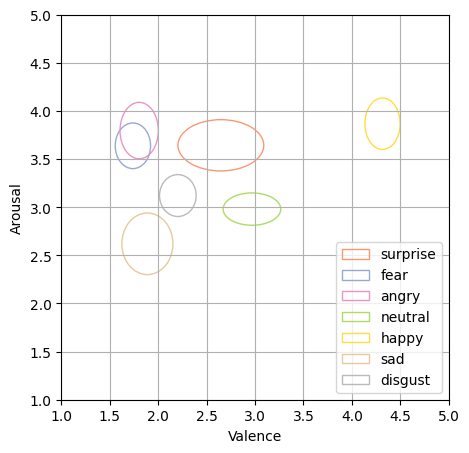

In [99]:

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
from matplotlib import colormaps

from matplotlib.patches import Ellipse
'''
patches.Ellipse(
       xy = (5, 5), # xy xy coordinates of ellipse centre.
       width = 5,   # width Total length (diameter) of horizontal axis.
       height = 10, # height Total length (diameter) of vertical axis.
       angle = -40, # angle Rotation in degrees anti-clockwise. 0 by default
       edgecolor = 'black',
       linestyle = 'solid', 
       fill = True,
       facecolor = 'yellow',
   ))

'''
import seaborn as sns 
color_palette = sns.color_palette("Set2")

fig, ax = plt.subplots(figsize=(5, 5))
for emotion_key in ellipse_dict.keys():
    x,y, width, hight = ellipse_dict.get(emotion_key)
    tmp = Ellipse((x,y), width, hight,
                  color=color_palette[emotion_key],
                  fill = False,
                  label=emotion_r.get(emotion_key),alpha=0.9) # Ellipse (x,y), width,  hight 
    ax.add_artist(tmp)

ax.set_xlim((1, 5))
ax.set_ylim((1, 5))
ax.legend()
ax.set_xlabel("Valence")
ax.set_ylabel("Arousal")
plt.grid()
plt.show()

# [eneu, ehap, esad, esur, efea, edis, eang], ["Neutral", "Happy", "Sad", "Surprise", "Fear", "Disgust", "Anger"]
# ax.set_xlim((-1, 1))
# ax.set_ylim((-1, 1))
# ax.set_xlabel("Valence")
# ax.set_ylabel("Arousal")
# ax.legend([eneu, ehap, esad, esur, efea, edis, eang], ["Neutral", "Happy", "Sad", "Surprise", "Fear", "Disgust", "Anger"])
# plt.show()

/tmp/ipykernel_77714/2184363907.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(['surprise', 'fear', 'angry', 'neutral', 'happy', 'sad', 'disgust'])


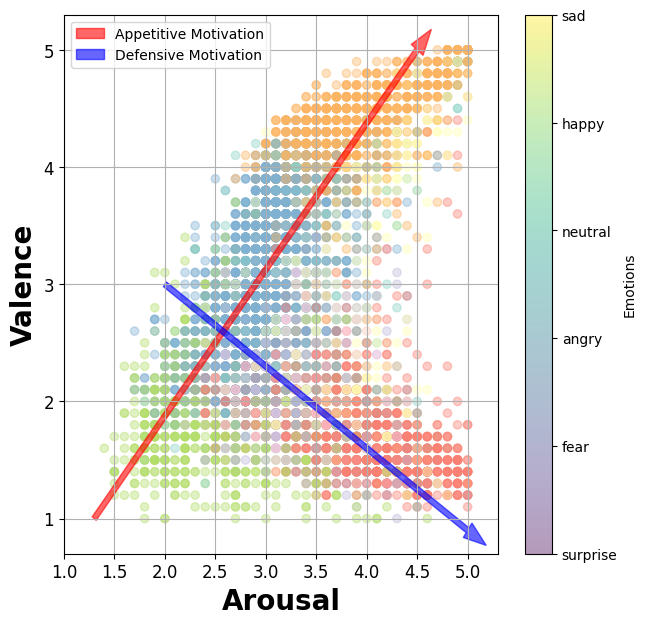

In [298]:
import seaborn as sns 

# refer : IAPS affective rating
import matplotlib.cm as cm
import matplotlib as mpl

color_palette   = mpl.colormaps['viridis']
# cmap = cm.bwr ## 또는 plt.cm.get_cmap('bwr')
vmax = 6
vmin = 0
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
colormapping = cm.ScalarMappable(norm=norm, cmap=color_palette)


sns_palette = sns.color_palette('Set3')

label_fsize = 20
ticks_fsize = 12
legend_size = 10

plt.figure(figsize=(7,7))
plt.scatter(df['arousal'], df['valence'],
            color=[sns_palette[int(i)] for i in df['emotion']],
            # cmap = colormapping,
            alpha=0.4)


plt.arrow(1.3, 1, 3.2,4, width = 0.05 ,label='Appetitive Motivation', alpha=0.6,color='red')
plt.arrow(2, 3,   3, -2.1,width = 0.05 ,label='Defensive Motivation', alpha=0.6,color='blue')




plt.xlabel('Arousal', fontweight='bold', fontsize=label_fsize)
plt.ylabel('Valence', fontweight='bold', fontsize=label_fsize)
plt.xlim(1,5.3)
plt.ylim(0.7,5.3)
plt.grid(True)
plt.yticks(fontsize=ticks_fsize, fontweight='normal')
plt.xticks(fontsize=ticks_fsize,
            fontweight='normal',
            )
plt.legend(loc='upper left',fontsize=legend_size,)

cb = plt.colorbar(label='Emotions', ax=plt.gca())
# cb.set_ticks([0,1,2,3,4,5,6])
cb.set_ticklabels(['surprise', 'fear', 'angry', 'neutral', 'happy', 'sad', 'disgust'])
# plt.legend(,
            #    loc='upper left',
            #    fontsize=legend_size,
            #    )
plt.show()





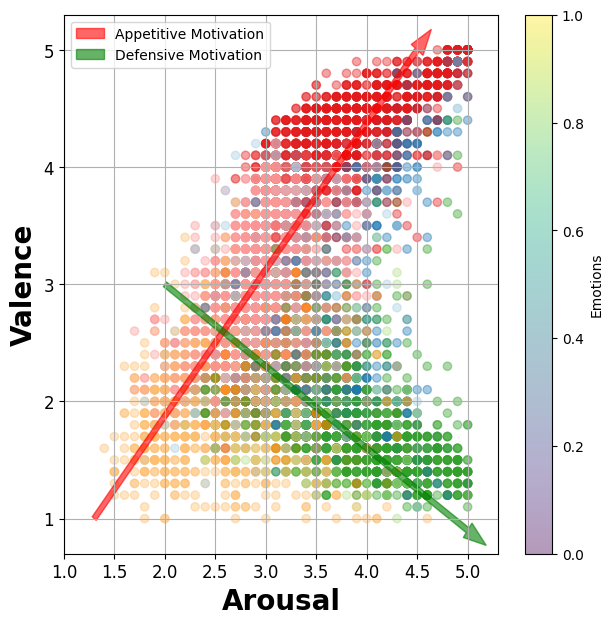

In [273]:
# refer : IAPS affective rating

color_palette = sns.color_palette("Paired")
label_fsize = 20
ticks_fsize = 12
legend_size = 10

plt.figure(figsize=(7,7))


plt.scatter(df['arousal'], df['valence'],
            # color=[f'C{int(i)}' for i in df['emotion']],
            color=[color_palette[int(i)] for i in df['emotion']],
            # edgecolors='black',linewidth=1,
            # label=df['emotion'],
            # label=[f'{emotion_r.get(i)}' for i in df['emotion']],
            alpha=0.4)


# plt.plot([1.3,4.7],[1,5.2],label='Appetitive Motivation', alpha=0.9,color='red')
plt.arrow(1.3, 1, 3.2,4, width = 0.05 ,label='Appetitive Motivation', alpha=0.6,color='red')
# plt.plot([2,5.2],[3,1],label='Appetitive Motivation', alpha=0.7,color='green')
plt.arrow(2, 3,   3, -2.1,width = 0.05 ,label='Defensive Motivation', alpha=0.6,color='green')
# plt.plot(x,z,label='z=3x')
# plt.legend(bbox_to_anchor=(1,1))

# [ 출처: https://seong6496.tistory.com/ ]



plt.xlabel('Arousal', fontweight='bold', fontsize=label_fsize)
plt.ylabel('Valence', fontweight='bold', fontsize=label_fsize)
plt.xlim(1,5.3)
plt.ylim(0.7,5.3)
plt.grid(True)
plt.yticks(fontsize=ticks_fsize, fontweight='normal')
plt.xticks(fontsize=ticks_fsize,
            fontweight='normal',
            )
plt.legend(loc='upper left',fontsize=legend_size,)



from matplotlib.colors import ListedColormap
# cmap = 
# cmap = ListedColormap(sns.color_palette("Paired"))
plt.colorbar(label='Emotions', ax=plt.gca())

# cb = plt.colorbar(label='Emotions', ax=plt.gca())

# cb.set_ticks([0,1,2,3,4,5,6])
# cb.set_ticklabels(, ,['surprise', 'fear', 'angry', 'neutral', 'happy', 'sad', 'disgust'])
# plt.legend(,
            #    loc='upper left',
            #    fontsize=legend_size,
            #    )
plt.show()


In [270]:
color_palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [262]:
from matplotlib.colors import ListedColormap

cb = fig.colorbar(cmap, label='Emotions')
cb.set_ticks([0,1,2,3,4,5,6])
# cb.set_ticklabels(['surprise', 'fear', 'angry', 'neutral', 'happy', 'sad', 'disgust'])


/tmp/ipykernel_77714/2251158169.py:3: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = fig.colorbar(cmap, label='Emotions')


AttributeError: 'ListedColormap' object has no attribute 'get_array'

/tmp/ipykernel_77714/4078327214.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(['surprise', 'fear', 'angry', 'neutral', 'happy', 'sad', 'disgust'])


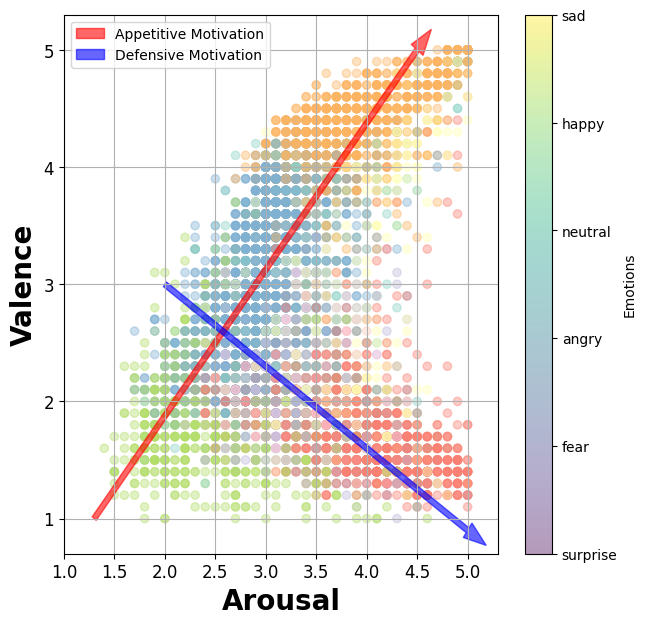

In [10]:
# for idx, row in df.iterrows():
#     # print(row[2])
#     plt.scatter(row.valence, row.arousal, color='C{}'.format(int(row.emotion)))

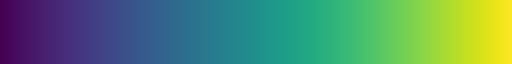

In [292]:
color_palette